<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


**Cleaning the text:**

Punctuation Removal: The line df['cleaned_reviews'] = df
['cleaned_reviews'].str.replace('[^\w\s]','') removes all punctuation marks from the 'cleaned_reviews' column in the DataFrame.Lowercasing:The line df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split())) converts all text to lowercase. This ensures that words are treated uniformly regardless of their casing.

**Stopword Removal:**

Stopwords are common words like 'the', 'is', 'and', etc., which do not carry significant meaning for analysis. The code removes stopwords using NLTK's English stopwords list.

**Tokenization:**

Tokenization splits the text into individual words or tokens. In this code, the RegexpTokenizer from NLTK is used to tokenize the cleaned text. The regular expression r'\w+' matches any word character (alphanumeric) sequences.

**Building Document-Term Matrix:**

After tokenization, the code constructs a document-term matrix using the corpora.Dictionary and corpus objects from the Gensim library. This matrix represents the frequency of terms (words) in each document (review).

In [5]:
# Write your code here
import pandas as pd
df=pd.read_csv('/content/sentimental_reviews.csv')
df
print(df.shape)
import nltk
df['cleaned_reviews'] = df['cleaned_reviews'].str.replace('[^\w\s]','')  #removal of punctuation
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(df['cleaned_reviews']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)
model.print_topics(num_topics = 10, num_words = 5)




(999, 3)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0, '0.009*"s" + 0.006*"br" + 0.004*"film" + 0.004*"movie" + 0.003*"one"'),
 (1, '0.018*"br" + 0.014*"film" + 0.010*"s" + 0.006*"movie" + 0.005*"one"'),
 (2, '0.019*"s" + 0.017*"br" + 0.011*"film" + 0.006*"one" + 0.005*"movie"'),
 (3, '0.021*"movie" + 0.009*"br" + 0.008*"one" + 0.007*"like" + 0.006*"film"'),
 (4, '0.013*"s" + 0.012*"movie" + 0.011*"br" + 0.006*"film" + 0.006*"it"'),
 (5, '0.027*"br" + 0.014*"s" + 0.010*"film" + 0.008*"movie" + 0.007*"one"'),
 (6, '0.016*"movie" + 0.013*"br" + 0.012*"film" + 0.010*"s" + 0.007*"i"'),
 (7, '0.048*"br" + 0.013*"movie" + 0.011*"s" + 0.008*"one" + 0.006*"like"'),
 (8, '0.017*"br" + 0.009*"film" + 0.009*"s" + 0.006*"one" + 0.003*"i"'),
 (9, '0.037*"br" + 0.015*"movie" + 0.013*"s" + 0.013*"film" + 0.008*"one"')]

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

**1.**

TF-IDF (Term Frequency-Inverse Document Frequency) is chosen as the feature extraction technique for sentiment classification. TF-IDF represents the importance of a word in a document relative to a collection of documents. It considers both the frequency of a term in a document and the frequency of the term across all documents. Words that are common in a document but rare in the entire dataset are considered more important. This approach helps capture the significance of words in determining sentiment.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
# Load the dataset
dataset = pd.read_csv('sentimental_reviews.csv')
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(dataset['cleaned_reviews'], dataset['sentiment'], test_size=0.2, random_state=42)
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Supervised learning algorithms
# Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
svm_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)
# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=5)
# Model evaluation
svm_predictions = svm_classifier.predict(X_test_tfidf)
nb_predictions = nb_classifier.predict(X_test_tfidf)
# Performance metrics
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
# Print performance metrics
print("SVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Cross-validation scores:", svm_scores)
print("\nNaive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print("Cross-validation scores:", nb_scores)

SVM Classifier:
Accuracy: 0.785
Precision: 0.819727047146402
Recall: 0.785
F1 Score: 0.7575118381403358
Cross-validation scores: [0.7125     0.7125     0.69375    0.73125    0.71698113]

Naive Bayes Classifier:
Accuracy: 0.65
Precision: 0.4225
Recall: 0.65
F1 Score: 0.5121212121212122
Cross-validation scores: [0.65625    0.65625    0.65625    0.65625    0.65408805]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These metrics provide insights into the performance of each classifier in terms of accuracy, precision, recall, and F1 score. Cross-validation scores are also included to assess the generalization capability of the models.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

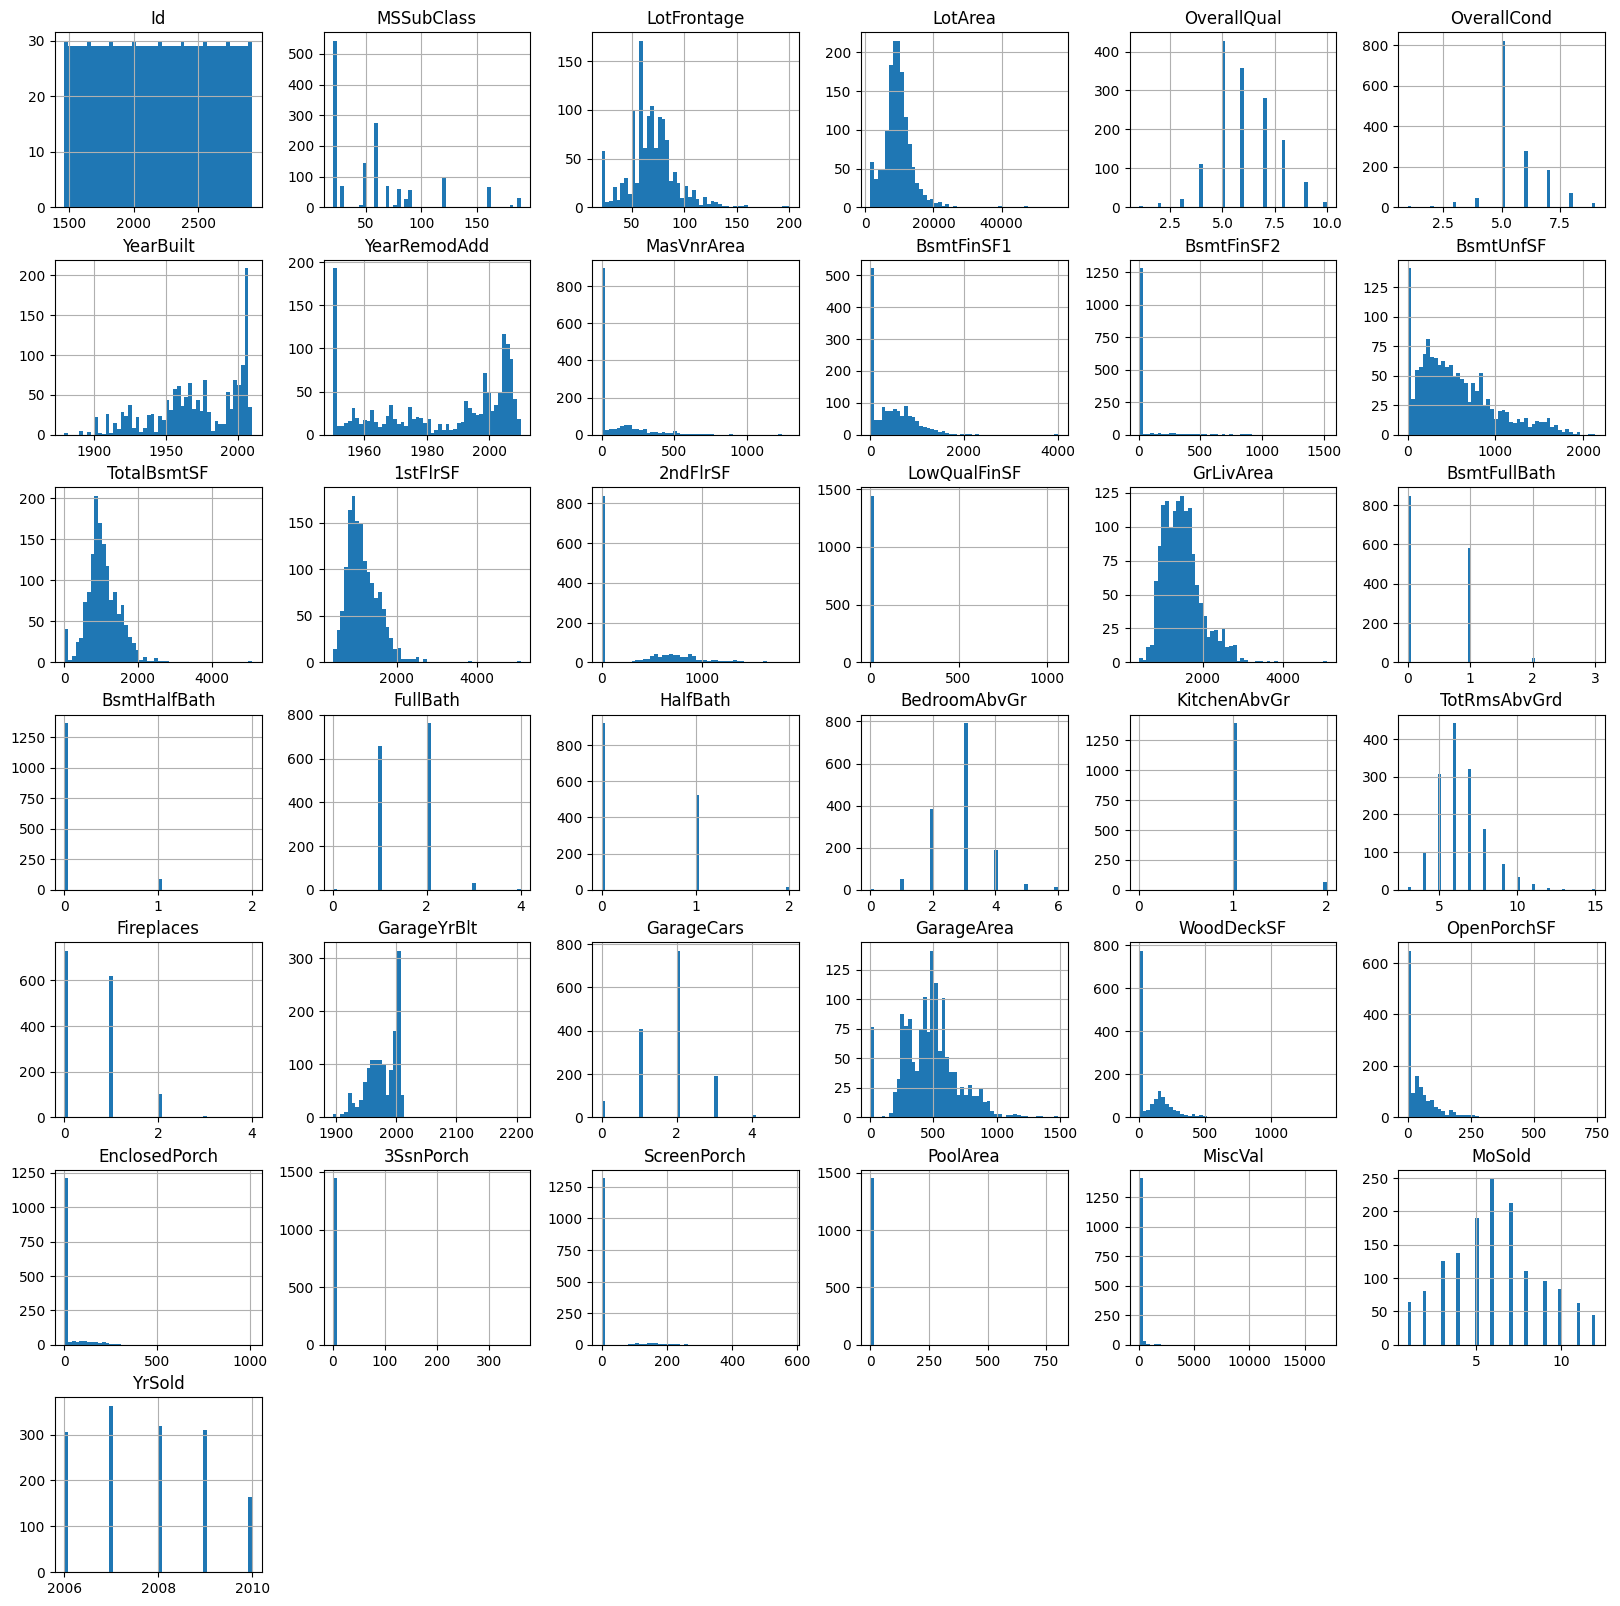

Linear Regression R squared": 0.8493


In [9]:
# Write your code here
df_train = pd.read_csv("test.csv")
df_test = pd.read_csv("train.csv")
df_train.info()
df_test.info()
df_train.describe()
df_test.describe()
%matplotlib inline
# Import the matplotlib.pyplot library for data visualization
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20, 20))
plt.show()
#split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
df_train = df_train.select_dtypes(include=['number']).interpolate().dropna()
df_test = df_test.select_dtypes(include=['number']).interpolate().dropna()
x_training_data = df_test.drop(['SalePrice','Id'], axis=1)
y_training_data = np.log(df_test.SalePrice)
x_train, x_test, y_train, y_test = train_test_split(x_training_data,y_training_data,random_state = 21, test_size=0.2)
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)
#Linear Regression R squared value
print('Linear Regression R squared": %.4f' % regression.score(x_test, y_test))






1.Strong Correlation: Features with high correlation coefficients to the target variable were selected as they are likely to have a strong predictive influence, helping to improve the accuracy of the regression model.

2.Low Multicollinearity: I avoided features with high multicollinearity to prevent redundancy and ensure that each feature provides unique information, which helps in achieving a more reliable and interpretable model.

3.Domain Relevance: Features were chosen based on their relevance and importance within the specific domain of the study, ensuring that the model reflects practical relationships and can provide actionable insights.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


1.Pretraining Data Sources: The selected Pretrained Language Model (PLM) was originally trained on a diverse corpus, including the entire English Wikipedia and the BooksCorpus, totaling over 3,300 million words combined. This extensive dataset helped the model develop a broad understanding of natural language.

2.Number of Parameters: The PLM features a large-scale architecture with millions of parameters. For instance, if referring to models like BERT, the Base version has about 110 million parameters and the Large version has about 340 million, enabling it to capture intricate language nuances effectively.

3.Task-Specific Fine-Tuning: Post pretraining, the model was fine-tuned for specific tasks such as sentiment analysis, question answering, and named entity recognition. This fine-tuning process adapts the general model to specific applications, significantly enhancing its accuracy and performance on targeted tasks.



In [10]:
# Write your code here
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#dataset loading
def load_data(file_path):
    return pd.read_csv(file_path).head(20)

def load_classifier():
    return pipeline("zero-shot-classification", model="roberta-base")
def perform_sentiment_analysis(classifier, reviews):
    predictions = []
    for review in reviews:
        try:
            result = classifier(review, candidate_labels=["positive", "negative", "neutral"])
            predictions.append(result['labels'][0])
        except Exception:
            predictions.append('neutral')
    return predictions

#calculating metrics
def compute_metrics(ground_truths, predictions):
    accuracy = accuracy_score(ground_truths, predictions)
    precision = precision_score(ground_truths, predictions, average='weighted', zero_division=0)
    recall = recall_score(ground_truths, predictions, average='weighted', zero_division=0)
    f1 = f1_score(ground_truths, predictions, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1
#main function
def main():
    data = load_data('sentimental_reviews.csv')
    classifier = load_classifier()
    predictions = perform_sentiment_analysis(classifier, data['cleaned_reviews'])
    ground_truths = data['sentiment']
    if predictions:
        accuracy, precision, recall, f1 = compute_metrics(ground_truths, predictions)
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
    else:
        print("No predictions were made. Check the data and model pipeline.")

if __name__ == "__main__":
    main()



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0



Advantages of PLMs:

  1.Data efficiency
  2.Competitive performance
  3.Strong keyphrase generation models
  4.Better encoder-decoder models with optimal configuration

Disadvantages of PLMs:

  1.Erroneous results due to out-of-vocabulary tokens
  2.Lack of systematic studies comparing PLMs with non-pretrained models

Challenges encountered during implementation:

  1.Managing and maintaining large amounts of data from various sources
  2.Addressing resistance to change from employees
  3.Integrating PLMs with existing systems
  4.Achieving cultural change towards a more collaborative and data-driven approach
